# Análise exploratória de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set_style('darkgrid')
sns.set_palette("flare")

## 1. Descrição dos dados

In [5]:
tips = pd.read_csv('../data/raw/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Dataset contém 244 instâncias

In [6]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Nenhuma coluna tem valores nulos

In [7]:
dictionary = pd.read_csv('../data/external/data-dict.csv')
dictionary

,variavel,descricao,tipo,subtipo
0,total_bill,Valor total da conta (em dólares),quantitativa,contínua
1,tip,Valor da gorjeta (em dólares),quantitativa,contínua
2,sex,Sexo da pessoa que pagou a conta,qualitativa,nominal
3,smoker,Indica se havia fumantes no grupo,qualitativa,nominal
4,day,Dia da semana em que a refeição foi consumida,qualitativa,nominal
5,time,Momento do dia em que a refeição foi consumida,qualitativa,nominal
6,size,Número de pessoas no grupo,quantitativa,discreta


## 2. Perguntas de partida e hipóteses

 ### Perguntas de partida
 - O valor da gorjeta é proporcional ao valor da conta?
 - Qual é a distribuição dos valores de gorjeta?
 - Qual é a distribuição dos valores da conta?   
 - Ter um fumante no grupo muda no valor da gorjeta ou conta?
 - Quais dias tiveram mais pessoas?
 - Quais refeições tiveram mais pessoas?
 - Qual média de gorjeta ou conta por dia? E por refeição?
 - A hora impacta no valor da gorjeta?
 - A quantidade de pessoas no grupo impacta no valor da gorjeta?
 - Qual é a correlação entre o valor total da conta e a gorjeta em diferentes dias da semana?
 - Qual é a proporção média da gorjeta em relação ao valor total da conta?
 - Existe uma diferença significativa no valor da gorjeta entre homens e mulheres?
 - Qual refeição vai mais fumantes?

 
 ### Hipóteses
 
 - A quantidade de pessoas interfere no valor da conta e da gorjeta
 - Os finais de semana juntam mais pessoas 
 - Almoço juntam mais pessoas
 

## 3. Insights

### Qual é a distribuição dos valores de gorjeta e conta?

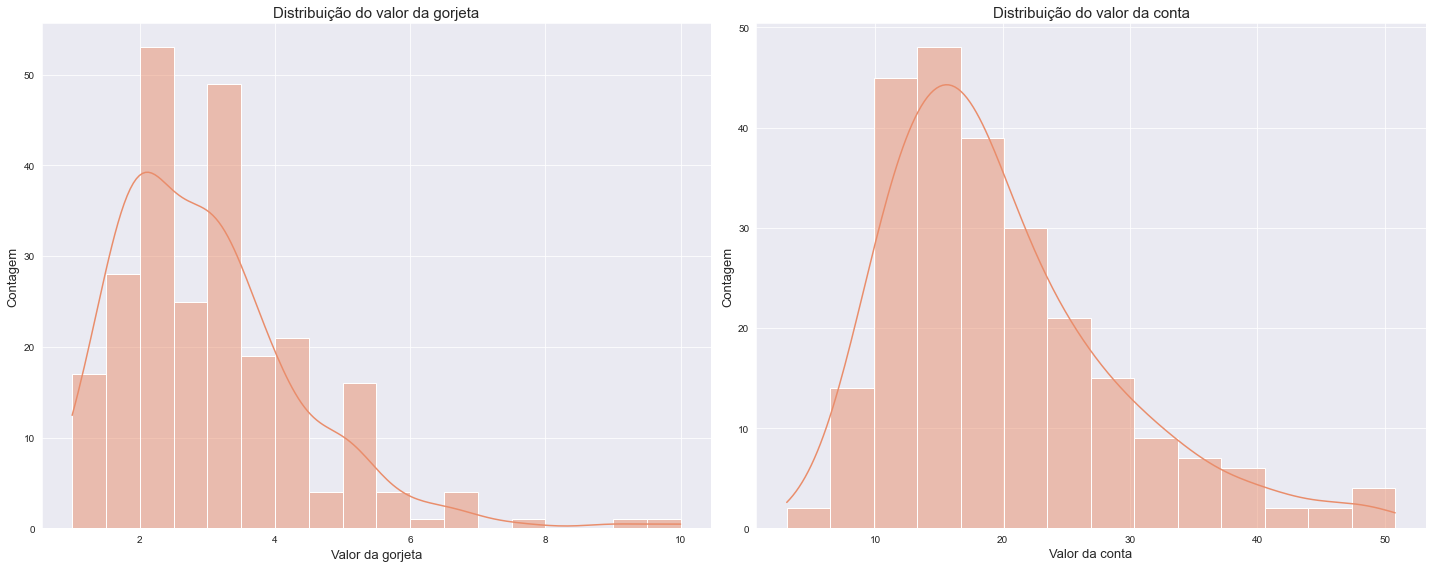

In [6]:

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Primeiro gráfico
sns.histplot(data=tips, x='tip', kde=True, ax=axes[0])
axes[0].set_title('Distribuição do valor da gorjeta', fontsize=15)
axes[0].set_xlabel('Valor da gorjeta', fontsize=13)
axes[0].set_ylabel('Contagem', fontsize=13)

# Segundo gráfico
sns.histplot(data=tips, x='total_bill', kde=True, ax=axes[1])
axes[1].set_title('Distribuição do valor da conta', fontsize=15)
axes[1].set_xlabel('Valor da conta', fontsize=13)
axes[1].set_ylabel('Contagem', fontsize=13)

plt.tight_layout()
plt.show()


Podemos perceber que tanto a distribuição da gorjeta e distribuição da conta são assimétricas à direita. 

- Gorjeta: Contendo os maiores picos um pouco acima de 2 e um pouco abaixo de 4

- Conta: Contendo os maiores picos um pouco acima de 10 e próximo de 15

***

### O valor da gorjeta é proporcional ao valor da conta?

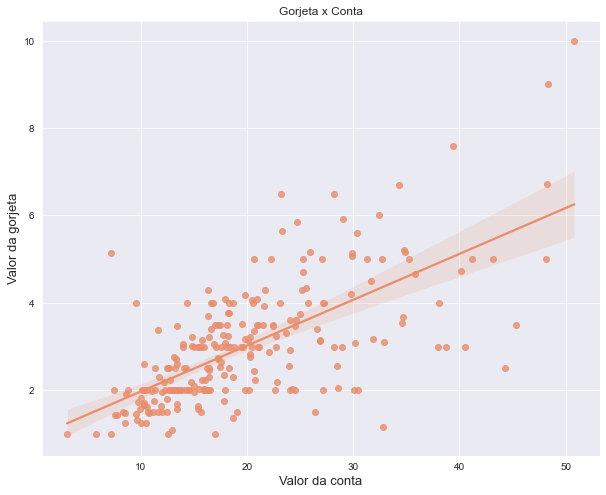

In [10]:
plt.figure(figsize=(10,8))
sns.regplot(data=tips, x='total_bill', y='tip')

plt.title('Gorjeta x Conta')
plt.xlabel('Valor da conta', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

plt.show()

Apenas utilizando o gráfico de dispersão podemos notar que tem sim uma correlação, mas para termos uma ideia melhor vamos utilizar o [coeficiente de pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

In [7]:
def pearson_coeff(variavel1,variavel2):
    coeff_pearson, p_value = pearsonr(variavel1,variavel2)
    
    return coeff_pearson


coeff_pearson = pearson_coeff(tips['total_bill'], tips['tip'])

print(f'Coeficiente de pearson: {coeff_pearson}')

Coeficiente de pearson: 0.6757341092113647


Utilizando o coeficiente de pearson podemos classificar a correlação como forte.

***

### Ter um fumante no grupo muda no valor da gorjeta ou conta?

In [12]:
tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

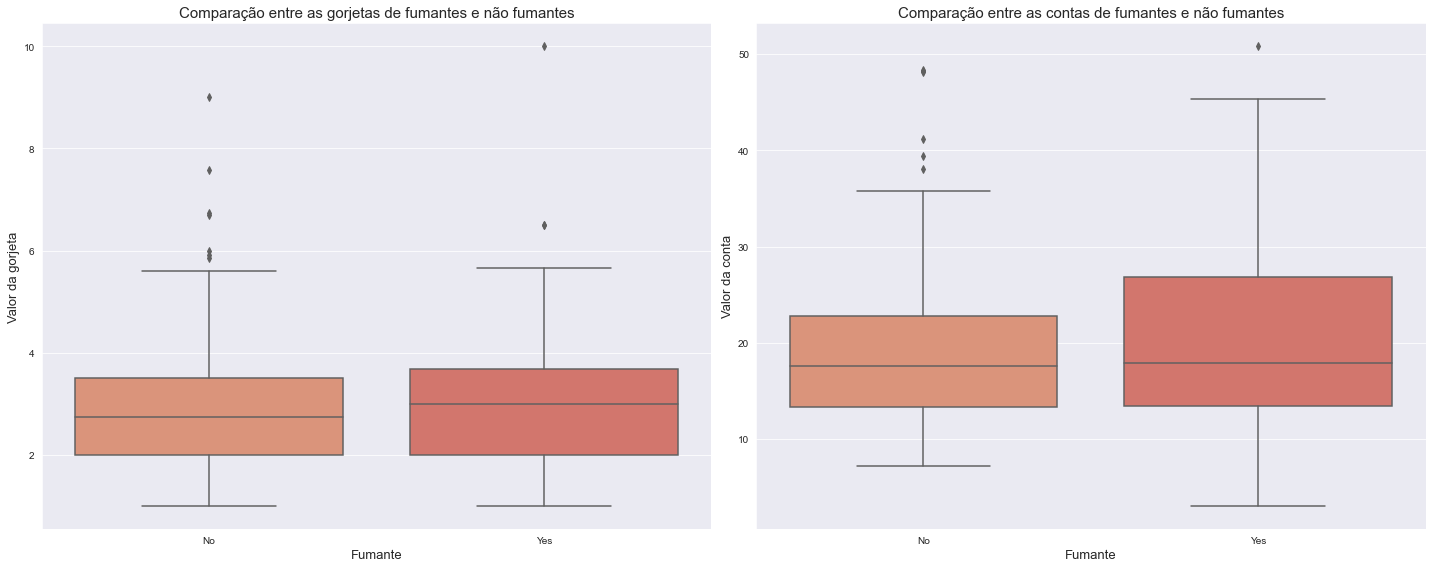

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(data=tips, x='smoker', y='tip', ax=axes[0])
axes[0].set_title('Comparação entre as gorjetas de fumantes e não fumantes', fontsize=15)
axes[0].set_xlabel('Fumante', fontsize=13)
axes[0].set_ylabel('Valor da gorjeta', fontsize=13)


sns.boxplot(data=tips, x='smoker', y='total_bill', ax=axes[1])
axes[1].set_title('Comparação entre as contas de fumantes e não fumantes', fontsize=15)
axes[1].set_xlabel('Fumante', fontsize=13)
axes[1].set_ylabel('Valor da conta', fontsize=13)


plt.tight_layout()
plt.show()

Observando o boxplot é perceptível que a categoria de fumante teve uma mediana maior, significando que em média os fumantes deram mais gorjeta.

Também podemos notar o Q1 para as duas categorias são iguais, enquanto Q3 de `yes` é um pouco acima do `no`, isso significa uma maior variabilidade do conjunto de dados dos `fumantes`.

Podemos notar que as medianas são praticamente idênticas, mas o limite superior da caixa (terceiro quartil) é maior para a categoria "fumante". Isso significa uma maior variabilidade dos dados e que para 75% das contas estão abaixo do Q3, os fumantes tendem a pagar mais do que os não fumantes.

***

### Quais dias tiveram mais pessoas?

In [29]:
day_size = tips.groupby('day')['size'].mean().reset_index()

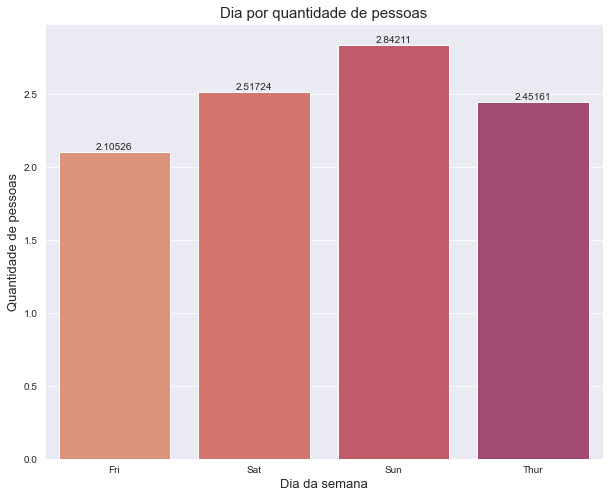

In [30]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=day_size, x = 'day', y = 'size')

ax.bar_label(ax.containers[0])


plt.title('Dia por quantidade de pessoas', fontsize=15)
plt.xlabel('Dia da semana', fontsize=13)
plt.ylabel('Quantidade de pessoas', fontsize=13)

plt.show()

Podemos perceber que os finais de semana tiveram um maior número de pessoas, com isso confirmando a hipótese feita no início.

***

### Quais refeições tiveram mais pessoas?

In [17]:
time_size = tips.groupby('time')['size'].sum().reset_index()

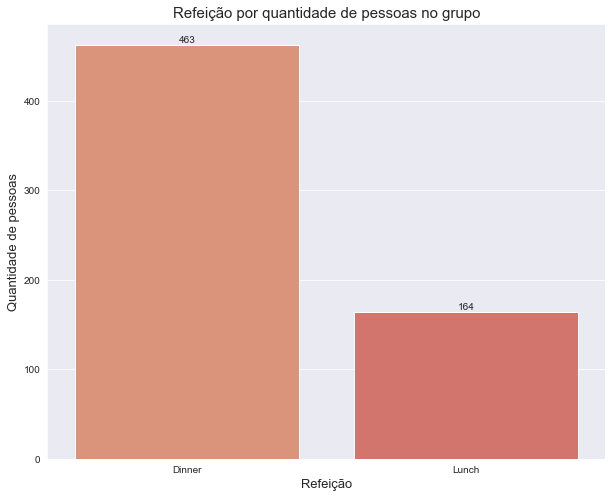

In [18]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=time_size, x = 'time', y = 'size')

ax.bar_label(ax.containers[0])


plt.title('Refeição por quantidade de pessoas no grupo', fontsize=15)
plt.xlabel('Refeição', fontsize=13)
plt.ylabel('Quantidade de pessoas', fontsize=13)

plt.show()

Podemos notar que o jantar tem uma quantidade maior de pessoas, com isso não confirmando nossa hipótese para que o almoço tenha mais pessoas.

***

### Qual média de gorjeta/conta por dia? E por refeição?

In [19]:
day_tip = tips.groupby('day')['tip'].sum().reset_index()

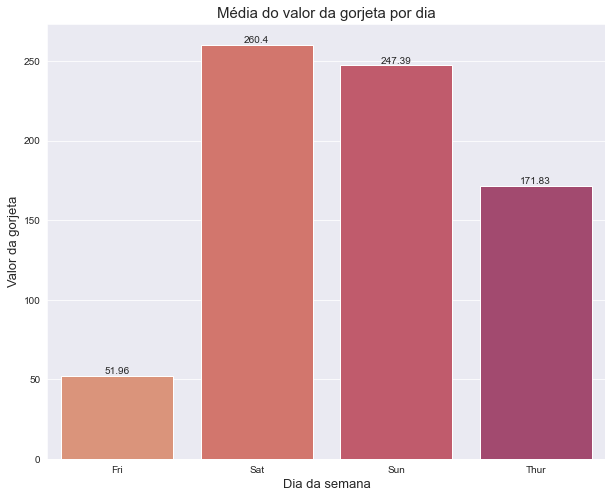

In [20]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=day_tip, x = 'day', y = 'tip')

ax.bar_label(ax.containers[0])

plt.title('Média do valor da gorjeta por dia', fontsize=15)
plt.xlabel('Dia da semana', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

plt.show()

In [21]:
day_bill = tips.groupby('day')['total_bill'].mean().reset_index()

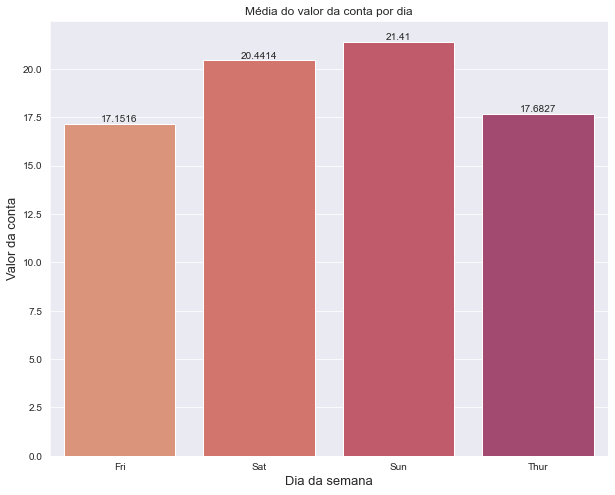

In [22]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=day_bill, x = 'day', y = 'total_bill')

ax.bar_label(ax.containers[0])

plt.title('Média do valor da conta por dia')

plt.xlabel('Dia da semana', fontsize=13)
plt.ylabel('Valor da conta', fontsize=13)

plt.show()

Podemos notar que no final de semana tanto a gorjeta e a conta que o valor da conta são maiores

***

### A refeição impacta no valor da gorjeta?

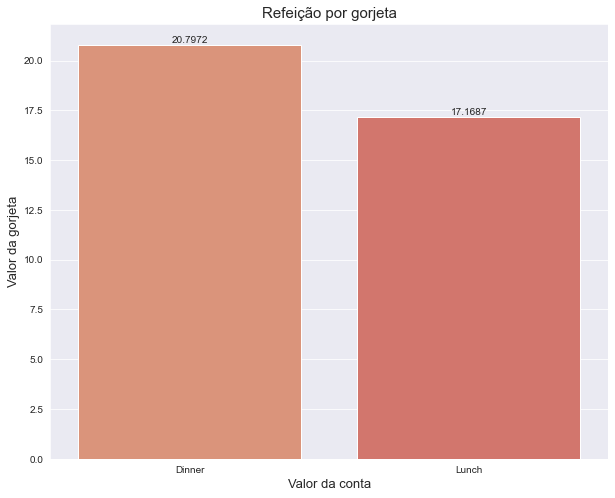

In [23]:
time_bill = tips.groupby('time')['total_bill'].mean().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot(data=time_bill, x = 'time', y = 'total_bill')

ax.bar_label(ax.containers[0])

plt.title('Refeição por gorjeta', fontsize=15)
plt.xlabel('Valor da conta', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

plt.show()

***

### A quantidade de pessoas no grupo impacta no valor da gorjeta?

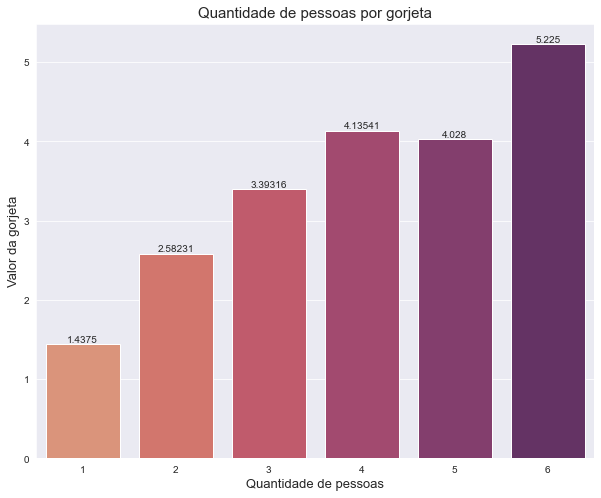

In [24]:
size_tip = tips.groupby('size')['tip'].mean().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot(data=size_tip, x = 'size', y = 'tip')

ax.bar_label(ax.containers[0])


plt.title('Quantidade de pessoas por gorjeta', fontsize=15)
plt.xlabel('Quantidade de pessoas', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

plt.show()

***

### Qual é a correlação entre o valor total da conta e a gorjeta em diferentes dias da semana?



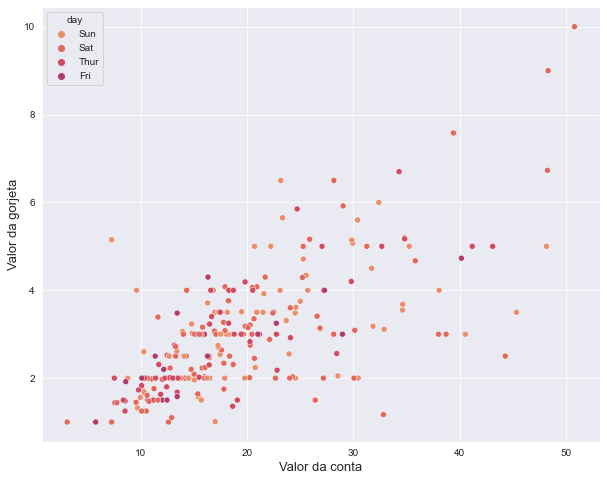

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=tips, x = 'total_bill', y = 'tip', hue = 'day')

plt.xlabel('Valor da conta', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

plt.show()

In [26]:
tips.groupby('day')[['total_bill', 'tip']].corr().unstack().iloc[:, 1].reset_index()

,day,total_bill
,,tip
0,Fri,0.771934
1,Sat,0.703632
2,Sun,0.501753
3,Thur,0.812406


A correlação muda para cada dia na semana, sendo quinta o dia com maior correlação entre a conta e a gorjeta.

***

### Qual é a correlação entre o valor total da conta e a gorjeta em relação a quantidade de pessoas?

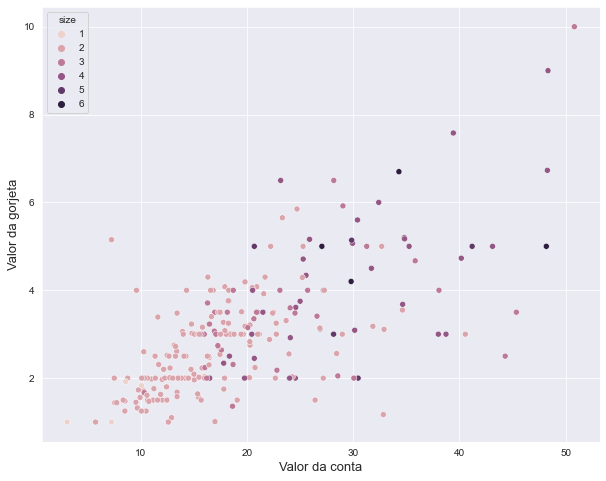

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=tips, x = 'total_bill', y = 'tip', hue = 'size')

plt.xlabel('Valor da conta', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

plt.show()

Podemos notar que em grupos de uma pessoas as ocorrências se concentram abaixo de 20 dólares no valor da conta.

Com o aumento do tamanho dos grupos o valor da conta também aumenta.

***

### Qual é a proporção média da gorjeta em relação ao valor total da conta?

In [27]:
proporcao = (tips['tip']/tips['total_bill'])*100
proporcao.mean()

16.080258172250463

Interessante que em média a proporção da gorjeta fica em 16% do valor da conta

### Existe uma diferença significativa no valor da gorjeta entre homens e mulheres?


In [28]:
tips.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

A média de gorjeta dos homens é um pouco acima das mulheres.

***

### Qual refeição vai mais fumantes?

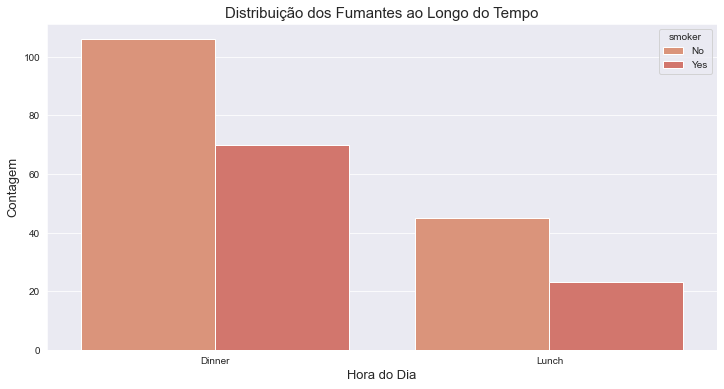

In [19]:
time_smoker = tips.groupby(['time', 'smoker']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))

sns.barplot(data=time_smoker, x='time', y='count', hue='smoker')

plt.title('Distribuição dos Fumantes ao Longo do Tempo', fontsize=15)
plt.xlabel('Hora do Dia', fontsize=13)
plt.ylabel('Contagem', fontsize=13)

plt.show()